In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('seattleWeather_1948-2017.csv')

In [3]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
data.shape

(25551, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [6]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [7]:
data.PRCP.fillna(data.PRCP.mean(),inplace=True)

In [8]:
data['RAIN'].fillna(False,inplace=True)

In [9]:
data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

<AxesSubplot:xlabel='TMIN', ylabel='PRCP'>

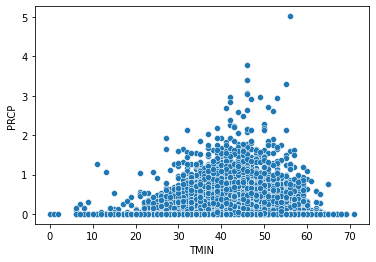

In [10]:
sns.scatterplot(x=data.TMIN,y=data.PRCP)

In [11]:
#min temp is 30-60 degree when precipitation increases

<AxesSubplot:xlabel='TMAX', ylabel='PRCP'>

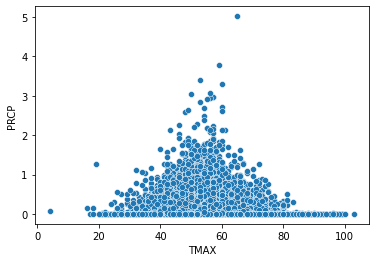

In [12]:
sns.scatterplot(x=data.TMAX,y=data.PRCP)

In [13]:
#from 40-80 Degree prcp increses

<AxesSubplot:xlabel='TMIN', ylabel='Count'>

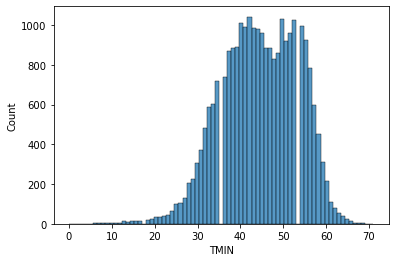

In [14]:
sns.histplot(data['TMIN'])

<AxesSubplot:xlabel='TMAX', ylabel='Count'>

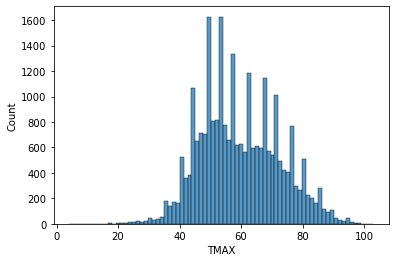

In [15]:
sns.histplot(data['TMAX'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TMIN'>

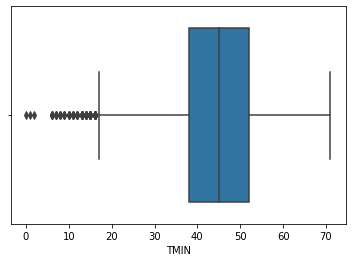

In [16]:
sns.boxplot('TMIN',data=data)

In [17]:
# drop the outlier less than 17 in TMIN
data=data.drop(data[data['TMIN']<17].index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TMAX'>

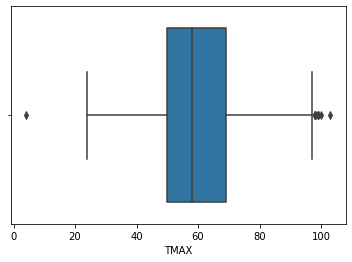

In [18]:
sns.boxplot('TMAX',data=data)

In [19]:
data=data.drop((data[data['TMAX']>97]).index | (data[data['TMAX']<21]).index)

C:\Users\SNEHAG~1\AppData\Local\Temp/ipykernel_11032/1254949740.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  data=data.drop((data[data['TMAX']>97]).index | (data[data['TMAX']<21]).index)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRCP'>

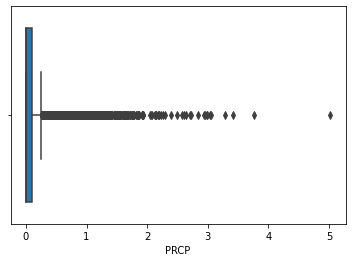

In [20]:
sns.boxplot('PRCP',data=data)

In [21]:
data=data.drop((data[data['PRCP']>0.25]).index )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRCP'>

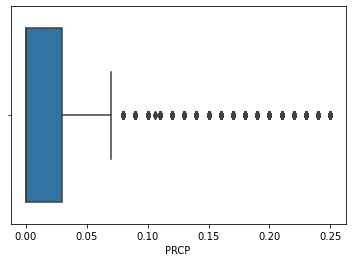

In [22]:
sns.boxplot('PRCP',data=data)

In [23]:
data.shape

(21893, 5)

In [24]:
#applying scaling

In [26]:
from sklearn.preprocessing import LabelEncoder   #class
le=LabelEncoder()
data['RAIN']=le.fit_transform(data['RAIN'])

In [29]:
data['RAIN'].value_counts()

0    14569
1     7324
Name: RAIN, dtype: int64

In [31]:
df=data.copy()

In [36]:
#depen var
X=df.drop(['RAIN','DATE'],axis=1)
y=df['RAIN']

In [38]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [39]:
x_train.shape

(15325, 3)

In [40]:
x_test.shape

(6568, 3)

In [41]:
#applying logistic regresiion
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()

In [43]:
LogReg.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=LogReg.predict(x_test)

In [46]:
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[4306   25]
 [ 556 1681]]


In [48]:
data['RAIN'].value_counts()

0    14569
1     7324
Name: RAIN, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9115408038976858


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4331
           1       0.99      0.75      0.85      2237

    accuracy                           0.91      6568
   macro avg       0.94      0.87      0.89      6568
weighted avg       0.92      0.91      0.91      6568



In [52]:
#macro avg---function f1 for each label and returns the avg without considering the proportion of each label in dataset
#weighted avg---function f1 for each label and returns the avg considering the proportion of each label in dataset